# Simple Linear Regression

This notebook demonstrates a simple linear regression implementation. The dataset is generated from scikit-learn library.

## Visualize Input Data
First, a dataset is created and made of multiple examples with a single feature.

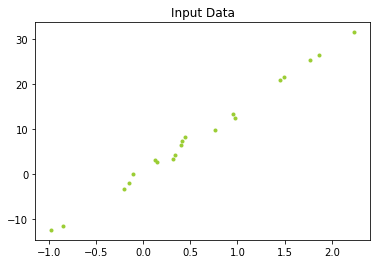

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate a random dataset
m = 20 # number of samples
x, y = datasets.make_regression(n_features=1, n_samples=m, 
                                random_state=0, noise=1.0)

# check the shape of the training data 
# x.shape is (n_samples, n_features=1)
# y.shape is (n_samples)

# Show the dataset
plt.title('Input Data')
plt.scatter(x, y, color='yellowgreen', marker='.')

## Generate Model (Analytic)

Our hypothesis for a single example is $h(x)=\theta_{0} + \theta_{1}x$ and we are looking for a $\theta$ to minimize the model.

Iterative methods (like gradient descent) could be applied to minimize the function but in this case, we are using the **normal equation**.

$$(X^{T}X)^{-1}.(X^{T}y)$$

In [3]:
# compute X
X = np.ones((m, 2)) 
X[:,1] = x.reshape(m)

# compute transpose(X)
Xt = np.transpose(X)

# compute the parameters with the Normal Equation : inv(transpose(X).X).(transpose(X)y)
thetas = np.linalg.pinv(np.dot(Xt, X)).dot(np.dot(Xt, y))

## Generate Model (Gradient Descent)


a common cost function (using the mean squared error) over $m$ examples is :

$$J(\theta_{0}, \theta_{1})= \frac{1}{2m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right )^2}$$

The **partial derivates** of $\frac{\partial J}{\partial \theta_{0}}$ :

$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right )}$$

The **partial derivates** of $\frac{\partial J}{\partial \theta_{1}}$ :

$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m} \sum_{i=1}^{m}{\left (h_{\theta}(x_{i})-y_{i} \right ).x_{i}}$$

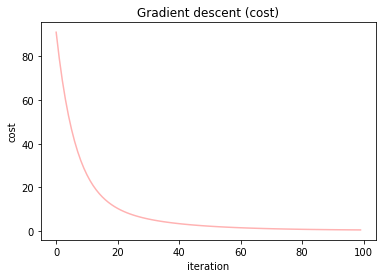

In [4]:
# vectorized implementation the equations above 
num_iterations = 100
learning_rate = 0.05
thetas = np.zeros(2)

# compute X
X = np.ones((m, 2)) 
X[:,1] = x.reshape(m)

# gradient descent
stats = np.empty(num_iterations)
for i in range(num_iterations):
    # update parameters
    error = (np.dot(X, thetas) - y)
    thetas[0] -= np.mean(error * X[:,0]) * learning_rate
    thetas[1] -= np.mean(error * X[:,1]) * learning_rate
    
    # store cost for future plotting
    new_error = (np.dot(X, thetas) - y)
    cost = np.dot(new_error, new_error) / (2*m)
    stats[i] = cost

plt.title('Gradient descent (cost)')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.plot(range(num_iterations),stats,'-r', alpha=0.3)

## Prediction

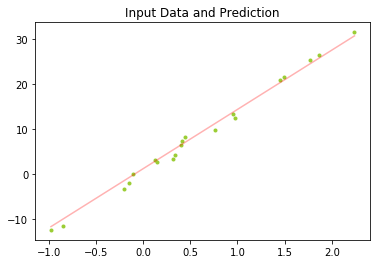

In [5]:
mn=np.min(x)
mx=np.max(x)
plot_x=np.linspace(mn,mx,500)
plot_y=thetas[0]+thetas[1]*plot_x # which is h(\theta)

plt.scatter(x, y, color='yellowgreen', marker='.')
plt.title('Input Data and Prediction')
plt.plot(plot_x,plot_y,'-r', alpha=0.3)
